<hr>
<font size=5 color='#217638'> <b> Glass Classification Analysis - Tolgahan Çepel </b> </font> 
<hr/>
<font color=green>

1. [Overview](#1)
1. [Importing Libraries and Reading the Dataset](#2)
1. [Data Visualization and Preprocessing](#3)
1. [Classification Models](#4) 
    * [Logistic Regression](#5) 
    * [K-Nearest Neighbors(K-NN)](#6)
    * [Support Vector Machine (SVM - Linear)](#7)
    * [Support Vector Machine (SVM - Kernel)](#8)
    * [Naive Bayes](#9) 
    * [Decision Tree Classification](#10) 
    * [Random Forest Classification](#11)
    * [Artificial Neural Network (ANN)](#12) 
1. [Comparing the Results](#13)
    * [Visualizing Models Performance](#14) 
1. [Conclusion](#15)
<hr/>

## <span id="1"></span> 1. Overview

Columns:
- <b> RI: </b> refractive index 
- <b> NA: </b> Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- <b> Mg: </b> Magnesium
- <b> Al: </b> Aluminum
- <b> K: </b> Potassium
- <b> Ca: </b> Calcium
- <b> Ba: </b> Barium
- <b> Fe: </b> Iron
- <b> Type of glass: </b> 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps

## <span id="2"></span> 2. Importing Libraries and Reading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [2]:
dataset = pd.read_csv('./dataset/glass.csv')
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## <span id="3"></span> 3. Data Visualization and Preprocessing

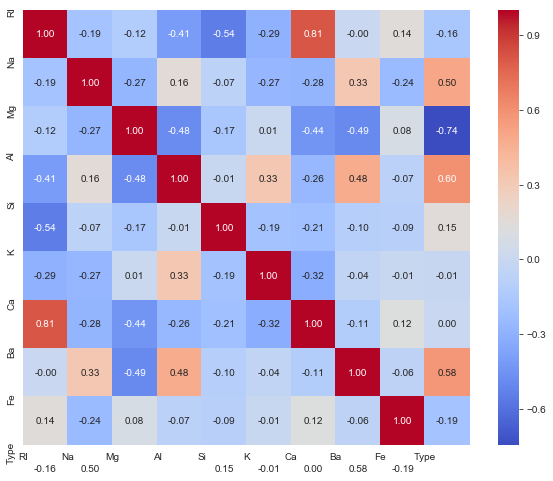

In [3]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

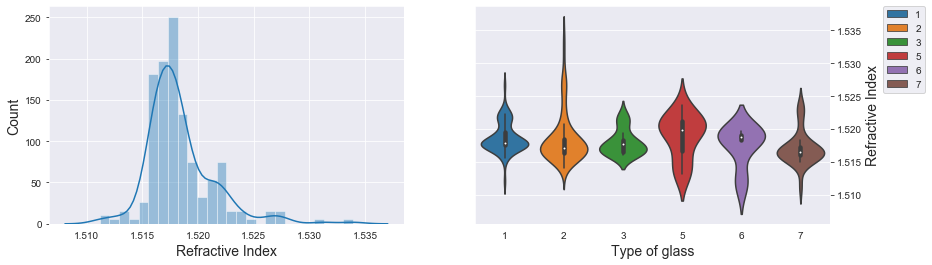

In [4]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['RI'], ax = axes[0])
axes[0].set_xlabel('Refractive Index', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'RI', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Refractive Index', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

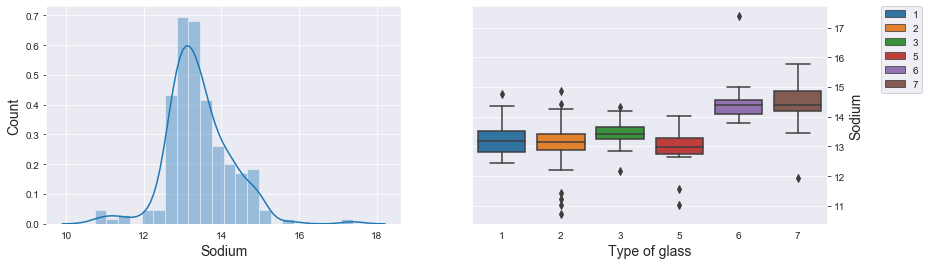

In [5]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Na'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'Type', y = 'Na', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

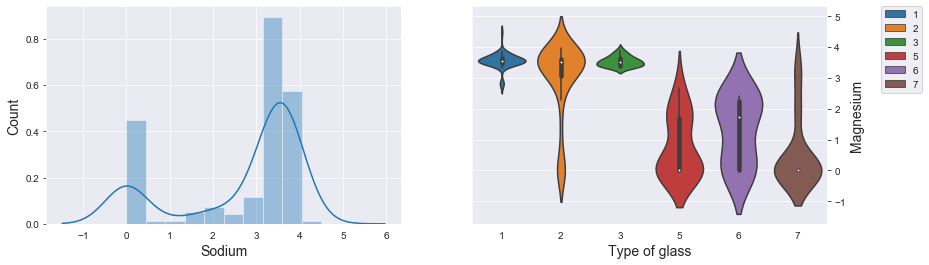

In [6]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Mg'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Mg', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Magnesium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

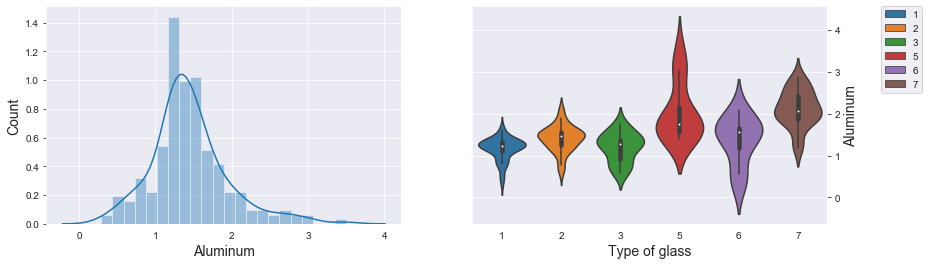

In [7]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Al'], ax = axes[0])
axes[0].set_xlabel('Aluminum', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Al', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Aluminum', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

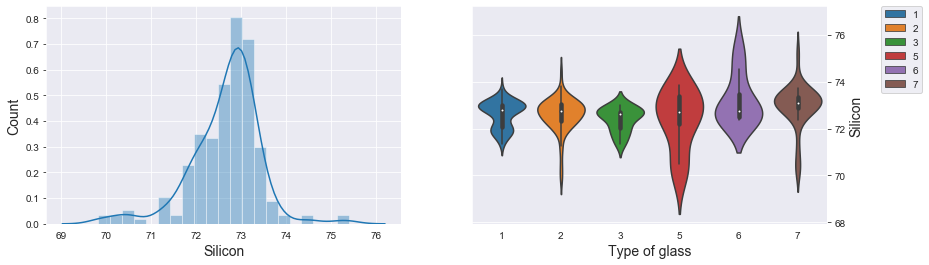

In [8]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Si'], ax = axes[0])
axes[0].set_xlabel('Silicon', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Si', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Silicon', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

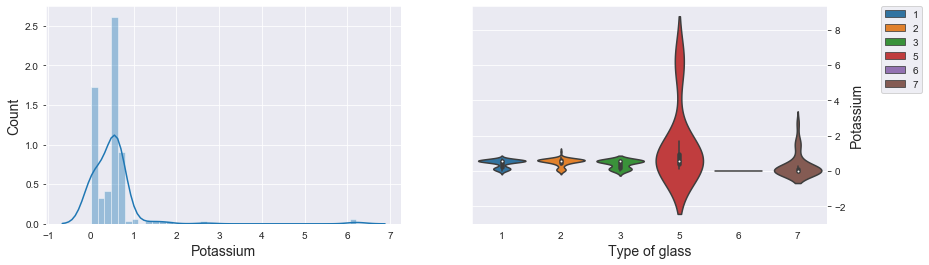

In [9]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['K'], ax = axes[0])
axes[0].set_xlabel('Potassium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'K', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Potassium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

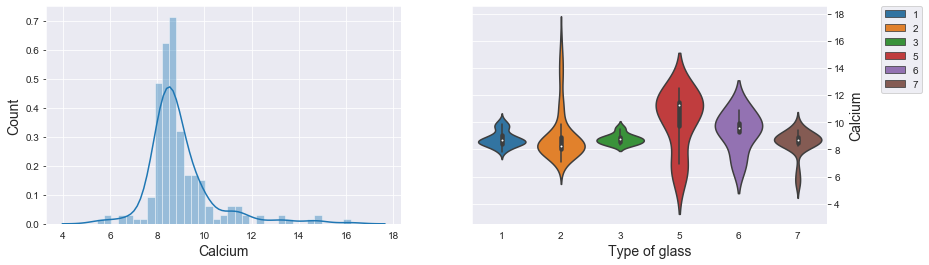

In [10]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Ca'], ax = axes[0])
axes[0].set_xlabel('Calcium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Ca', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Calcium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

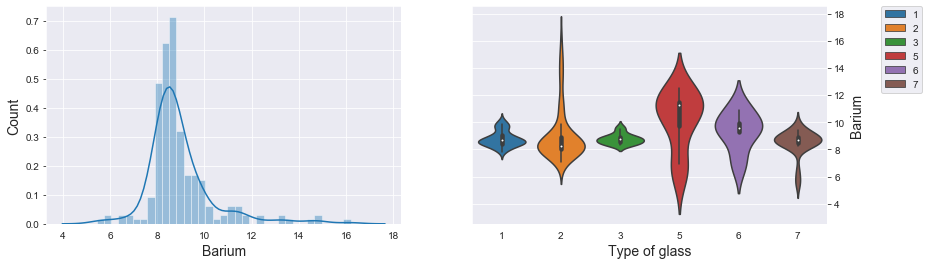

In [11]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Ca'], ax = axes[0])
axes[0].set_xlabel('Barium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Ca', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Barium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

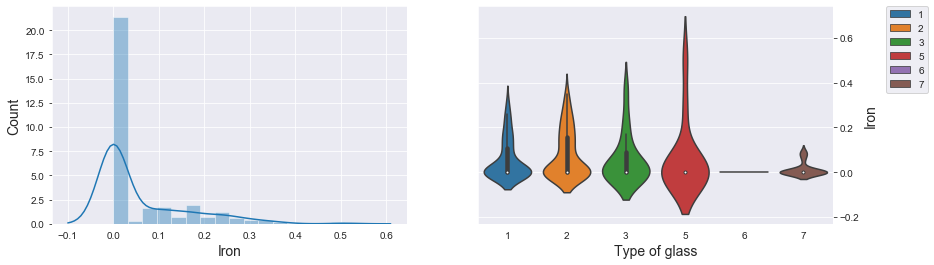

In [12]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Fe'], ax = axes[0])
axes[0].set_xlabel('Iron', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Fe', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Iron', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [13]:
X = dataset.drop('Type', axis = 1).values
y = dataset['Type'].values.reshape(-1,1)

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [15]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (160, 9)
Shape of X_test:  (54, 9)
Shape of y_train:  (160, 1)
Shape of y_test (54, 1)


## <span id="4"></span> 4. Classification Models

### <span id="5"></span> Logistic Regression

In [16]:
# Fitting Logistic Regression to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()
steps = [
    ('scalar', StandardScaler()),
    ('model', LogisticRegression())
]

lr_pipe = Pipeline(steps)

In [17]:
parameters = { 'model__C' : [1,10,100,1000,10000],
               'model__fit_intercept' : [True],
               'model__multi_class' : ['auto'],
               'model__tol' : [0.0001],
               'model__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'model__n_jobs' : [-1],
               'model__max_iter' : [5000],
               'model__random_state': [42] 
}
classifier_lr = GridSearchCV(lr_pipe, parameters, iid=False, cv = 3)
classifier_lr = classifier_lr.fit(X_train, y_train.ravel())

In [18]:
from sklearn.metrics import accuracy_score

y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

Training set:  0.68125
Test set:  0.6666666666666666


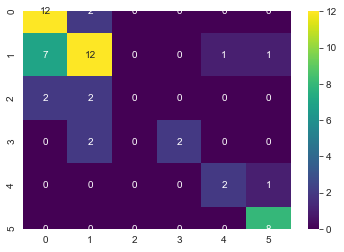

In [57]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="6"></span> K-Nearest Neighbors (K-NN)

In [20]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [21]:
parameters = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,11,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}
classifier_knn = GridSearchCV(knn_pipe, parameters, iid=False, cv = 3)
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())

In [22]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

Training set:  1.0
Test set:  0.7407407407407407


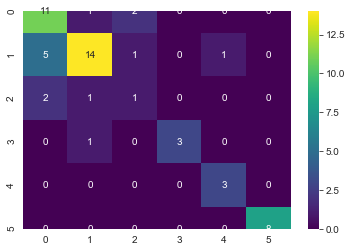

In [23]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="7"></span> Support Vector Machine (SVM - Linear)

In [24]:
from sklearn.svm import SVC
classifier_svm = SVC()
steps = [
    ('scalar', StandardScaler()),
    ('model', SVC())
]
svm_linear_pipe = Pipeline(steps)

In [25]:
parameters = { 'model__kernel' : ['linear'],
               'model__C' : [1,10,100,1000,10000],
               'model__random_state' : [42]
}
classifier_svm_linear = GridSearchCV(svm_linear_pipe, parameters, iid=False, cv = 3)
classifier_svm_linear = classifier_svm_linear.fit(X_train, y_train.ravel())

In [26]:
y_pred_svm_linear_train = classifier_svm_linear.predict(X_train)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set: ", accuracy_svm_linear_test)

Training set:  0.75
Test set:  0.7037037037037037


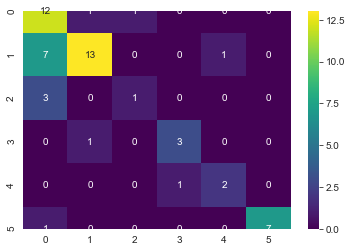

In [27]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm_linear_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="8"></span> Support Vector Machine (SVM - Kernel)

In [28]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_kernel = SVC()
steps = [
    ('scalar', StandardScaler()),
    ('model', SVC())
]
svm_kernel_pipe = Pipeline(steps)

In [29]:
parameters = { 'model__kernel' : ['rbf', 'poly', 'sigmoid'],
               'model__C' : [1,10,100,1000,10000],
               'model__gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
               'model__random_state' : [42],
               'model__degree' : [1,2,3]
}
classifier_svm_kernel = GridSearchCV(svm_kernel_pipe, parameters, iid=False, cv = 3)
classifier_svm_kernel = classifier_svm_kernel.fit(X_train, y_train.ravel())

In [30]:
y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set: ", accuracy_svm_kernel_train)

y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set: ", accuracy_svm_kernel_test)

Training set:  0.81875
Test set:  0.7777777777777778


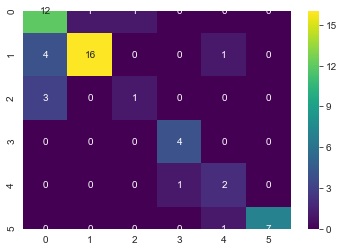

In [31]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm_kernel_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="9"></span> Naive Bayes

In [32]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  0.3125
Test set:  0.35185185185185186


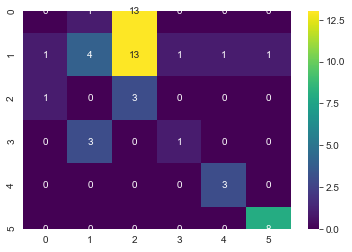

In [34]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="10"></span> Decision Tree Classification

In [35]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', DecisionTreeClassifier())
]
dt_pipe = Pipeline(steps)

In [36]:
# Applying Grid Search to find the best model and the best parameters
parameters = [ { "model__max_depth": np.arange(1,21),
                 "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                 "model__min_samples_split": np.arange(2, 11),
                 "model__criterion": ["gini"],
                 "model__random_state" : [42]}
            ]
classifier_dt = GridSearchCV(estimator = dt_pipe,
                           param_grid  = parameters,
                           cv = 3,
                           iid = False,
                           n_jobs = -1)
classifier_dt = classifier_dt.fit(X_train, y_train.ravel())

In [37]:
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

Training set:  0.9
Test set:  0.6851851851851852


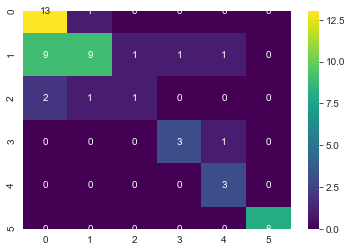

In [38]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="11"></span> Random Forest Classification

In [39]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_rf = RandomForestClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier())
]
rf_pipe = Pipeline(steps)

In [40]:
parameters =  { "model__n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                "model__max_features": ["auto", "sqrt"],
                "model__max_depth": np.linspace(10, 110, num = 11),
                "model__min_samples_split": [2, 5, 10],
                "model__min_samples_leaf": [1, 2, 4],
                "model__bootstrap": [True, False],
                "model__criterion": ["gini"],
                "model__random_state" : [42] }
            
classifier_rf = RandomizedSearchCV(estimator = rf_pipe,
                                  param_distributions = parameters,
                                  n_iter = 100,
                                  cv = 3,
                                  random_state=42,
                                  verbose = 4,
                                  n_jobs = -1)
classifier_rf = classifier_rf.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished
C:\Users\CEPEL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  1.0
Test set:  0.7962962962962963


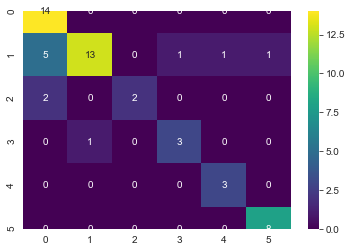

In [42]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="12"></span> Artificial Neural Network (ANN)

In [43]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [44]:
# Feature Scaling
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.fit_transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(160, 9)
(54, 9)


In [45]:
# Defining a function to encode output column
from keras.utils import to_categorical
def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded

In [46]:
y_train_encoded = encode(y_train)

Shape of data (BEFORE encode): (160, 1)
Shape of data (AFTER  encode): (160, 8)



In [47]:
y_test_encoded = encode(y_test)

Shape of data (BEFORE encode): (54, 1)
Shape of data (AFTER  encode): (54, 8)



In [48]:
y_train_encoded = np.delete(y_train_encoded, [0,4], axis = 1)
y_test_encoded = np.delete(y_test_encoded, [0,4], axis = 1)
print(y_train_encoded[2])
print(y_test_encoded[2])

[0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0.]


In [49]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded), batch_size = 100, epochs = 1150)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 160 samples, validate on 54 samples
Epoch 1/1150
160/160 [==============================] - 1s 9ms/step - loss: 1.7915 - acc: 0.2437 - val_loss: 1.7905 - val_acc: 0.3333
Epoch 2/1150
160/160 [==============================] - 0s 125us/step - loss: 1.7901 - acc: 0.3250 - val_loss: 1.7892 - val_acc: 0.3889
Epoch 3/1150
160/160 [==============================] - 0s 62us/step - loss: 1.7887 - acc: 0.3687 - val_loss: 1.7880 - val_acc: 0.4074
Epoch 4/1150
160/160 [==============================] - 0s 63us/step - loss: 1.7873 - acc: 0.3500 - val_loss: 1.7867 - val_acc: 0.3889
Epoch 5/1150
160/160 [==============================] - 0s 125us/step - loss: 1.7858 - acc: 0.3875 - val_loss: 1.7854 - val_acc: 0.3889
Epoch 6/1150
160/160 [==============================] - 0s 62us/step - loss: 1.7843 - acc: 0.3813 - val_loss: 1.7840 - val_acc: 0.4074
Epoch 7/1150
160/160 [==

Epoch 57/1150
160/160 [==============================] - 0s 62us/step - loss: 1.5913 - acc: 0.3562 - val_loss: 1.6077 - val_acc: 0.2593
Epoch 58/1150
160/160 [==============================] - 0s 63us/step - loss: 1.5841 - acc: 0.3563 - val_loss: 1.6017 - val_acc: 0.2593
Epoch 59/1150
160/160 [==============================] - 0s 0us/step - loss: 1.5771 - acc: 0.3562 - val_loss: 1.5956 - val_acc: 0.2593
Epoch 60/1150
160/160 [==============================] - 0s 0us/step - loss: 1.5695 - acc: 0.3563 - val_loss: 1.5896 - val_acc: 0.2593
Epoch 61/1150
160/160 [==============================] - 0s 62us/step - loss: 1.5627 - acc: 0.3563 - val_loss: 1.5835 - val_acc: 0.2593
Epoch 62/1150
160/160 [==============================] - 0s 63us/step - loss: 1.5554 - acc: 0.3625 - val_loss: 1.5774 - val_acc: 0.2593
Epoch 63/1150
160/160 [==============================] - 0s 62us/step - loss: 1.5480 - acc: 0.3625 - val_loss: 1.5714 - val_acc: 0.2593
Epoch 64/1150
160/160 [===========================

160/160 [==============================] - 0s 0us/step - loss: 1.2993 - acc: 0.4812 - val_loss: 1.3760 - val_acc: 0.3333
Epoch 118/1150
160/160 [==============================] - 0s 62us/step - loss: 1.2963 - acc: 0.4500 - val_loss: 1.3731 - val_acc: 0.3333
Epoch 119/1150
160/160 [==============================] - 0s 62us/step - loss: 1.2931 - acc: 0.4437 - val_loss: 1.3701 - val_acc: 0.3333
Epoch 120/1150
160/160 [==============================] - 0s 62us/step - loss: 1.2902 - acc: 0.4437 - val_loss: 1.3671 - val_acc: 0.3333
Epoch 121/1150
160/160 [==============================] - 0s 63us/step - loss: 1.2873 - acc: 0.4375 - val_loss: 1.3640 - val_acc: 0.3333
Epoch 122/1150
160/160 [==============================] - 0s 0us/step - loss: 1.2841 - acc: 0.4375 - val_loss: 1.3609 - val_acc: 0.3333
Epoch 123/1150
160/160 [==============================] - 0s 0us/step - loss: 1.2810 - acc: 0.4500 - val_loss: 1.3577 - val_acc: 0.3333
Epoch 124/1150
160/160 [==============================] - 0

160/160 [==============================] - 0s 62us/step - loss: 1.1214 - acc: 0.4875 - val_loss: 1.1989 - val_acc: 0.4444
Epoch 178/1150
160/160 [==============================] - 0s 62us/step - loss: 1.1193 - acc: 0.4875 - val_loss: 1.1970 - val_acc: 0.4444
Epoch 179/1150
160/160 [==============================] - 0s 63us/step - loss: 1.1171 - acc: 0.4875 - val_loss: 1.1950 - val_acc: 0.4444
Epoch 180/1150
160/160 [==============================] - 0s 0us/step - loss: 1.1152 - acc: 0.4875 - val_loss: 1.1930 - val_acc: 0.4444
Epoch 181/1150
160/160 [==============================] - 0s 62us/step - loss: 1.1131 - acc: 0.4875 - val_loss: 1.1911 - val_acc: 0.4444
Epoch 182/1150
160/160 [==============================] - 0s 62us/step - loss: 1.1111 - acc: 0.4875 - val_loss: 1.1890 - val_acc: 0.4444
Epoch 183/1150
160/160 [==============================] - 0s 62us/step - loss: 1.1091 - acc: 0.4875 - val_loss: 1.1869 - val_acc: 0.4444
Epoch 184/1150
160/160 [==============================] -

160/160 [==============================] - 0s 62us/step - loss: 1.0394 - acc: 0.5000 - val_loss: 1.1246 - val_acc: 0.4630
Epoch 238/1150
160/160 [==============================] - 0s 0us/step - loss: 1.0384 - acc: 0.5000 - val_loss: 1.1240 - val_acc: 0.4630
Epoch 239/1150
160/160 [==============================] - 0s 63us/step - loss: 1.0377 - acc: 0.4938 - val_loss: 1.1234 - val_acc: 0.4630
Epoch 240/1150
160/160 [==============================] - 0s 62us/step - loss: 1.0368 - acc: 0.4937 - val_loss: 1.1228 - val_acc: 0.4630
Epoch 241/1150
160/160 [==============================] - 0s 62us/step - loss: 1.0360 - acc: 0.5063 - val_loss: 1.1221 - val_acc: 0.4630
Epoch 242/1150
160/160 [==============================] - 0s 0us/step - loss: 1.0351 - acc: 0.5062 - val_loss: 1.1215 - val_acc: 0.4630
Epoch 243/1150
160/160 [==============================] - 0s 62us/step - loss: 1.0343 - acc: 0.5125 - val_loss: 1.1210 - val_acc: 0.4630
Epoch 244/1150
160/160 [==============================] - 

Epoch 297/1150
160/160 [==============================] - 0s 62us/step - loss: 1.0002 - acc: 0.5312 - val_loss: 1.0902 - val_acc: 0.5185
Epoch 298/1150
160/160 [==============================] - 0s 62us/step - loss: 0.9996 - acc: 0.5312 - val_loss: 1.0899 - val_acc: 0.5185
Epoch 299/1150
160/160 [==============================] - 0s 63us/step - loss: 0.9991 - acc: 0.5312 - val_loss: 1.0896 - val_acc: 0.5185
Epoch 300/1150
160/160 [==============================] - 0s 0us/step - loss: 0.9985 - acc: 0.5375 - val_loss: 1.0891 - val_acc: 0.5185
Epoch 301/1150
160/160 [==============================] - 0s 0us/step - loss: 0.9981 - acc: 0.5375 - val_loss: 1.0887 - val_acc: 0.5185
Epoch 302/1150
160/160 [==============================] - 0s 62us/step - loss: 0.9975 - acc: 0.5375 - val_loss: 1.0881 - val_acc: 0.5185
Epoch 303/1150
160/160 [==============================] - 0s 63us/step - loss: 0.9970 - acc: 0.5375 - val_loss: 1.0876 - val_acc: 0.5185
Epoch 304/1150
160/160 [===================

160/160 [==============================] - 0s 62us/step - loss: 0.9707 - acc: 0.5938 - val_loss: 1.0658 - val_acc: 0.5185
Epoch 357/1150
160/160 [==============================] - 0s 0us/step - loss: 0.9703 - acc: 0.5938 - val_loss: 1.0654 - val_acc: 0.5185
Epoch 358/1150
160/160 [==============================] - 0s 0us/step - loss: 0.9698 - acc: 0.6000 - val_loss: 1.0650 - val_acc: 0.5185
Epoch 359/1150
160/160 [==============================] - 0s 62us/step - loss: 0.9693 - acc: 0.6000 - val_loss: 1.0649 - val_acc: 0.5185
Epoch 360/1150
160/160 [==============================] - 0s 62us/step - loss: 0.9688 - acc: 0.6000 - val_loss: 1.0648 - val_acc: 0.5185
Epoch 361/1150
160/160 [==============================] - 0s 0us/step - loss: 0.9683 - acc: 0.5938 - val_loss: 1.0645 - val_acc: 0.5185
Epoch 362/1150
160/160 [==============================] - 0s 0us/step - loss: 0.9678 - acc: 0.5937 - val_loss: 1.0643 - val_acc: 0.5185
Epoch 363/1150
160/160 [==============================] - 0s

160/160 [==============================] - 0s 0us/step - loss: 0.9384 - acc: 0.6313 - val_loss: 1.0436 - val_acc: 0.5185
Epoch 417/1150
160/160 [==============================] - 0s 62us/step - loss: 0.9379 - acc: 0.6313 - val_loss: 1.0432 - val_acc: 0.5185
Epoch 418/1150
160/160 [==============================] - 0s 62us/step - loss: 0.9373 - acc: 0.6313 - val_loss: 1.0426 - val_acc: 0.5370
Epoch 419/1150
160/160 [==============================] - 0s 63us/step - loss: 0.9366 - acc: 0.6312 - val_loss: 1.0422 - val_acc: 0.5370
Epoch 420/1150
160/160 [==============================] - 0s 0us/step - loss: 0.9361 - acc: 0.6312 - val_loss: 1.0420 - val_acc: 0.5185
Epoch 421/1150
160/160 [==============================] - 0s 62us/step - loss: 0.9355 - acc: 0.6313 - val_loss: 1.0419 - val_acc: 0.5185
Epoch 422/1150
160/160 [==============================] - 0s 62us/step - loss: 0.9351 - acc: 0.6312 - val_loss: 1.0418 - val_acc: 0.5185
Epoch 423/1150
160/160 [==============================] - 

Epoch 476/1150
160/160 [==============================] - 0s 62us/step - loss: 0.9004 - acc: 0.6750 - val_loss: 1.0139 - val_acc: 0.6111
Epoch 477/1150
160/160 [==============================] - 0s 62us/step - loss: 0.8998 - acc: 0.6687 - val_loss: 1.0133 - val_acc: 0.6111
Epoch 478/1150
160/160 [==============================] - 0s 0us/step - loss: 0.8990 - acc: 0.6750 - val_loss: 1.0126 - val_acc: 0.6111
Epoch 479/1150
160/160 [==============================] - 0s 0us/step - loss: 0.8984 - acc: 0.6750 - val_loss: 1.0119 - val_acc: 0.6111
Epoch 480/1150
160/160 [==============================] - 0s 62us/step - loss: 0.8977 - acc: 0.6750 - val_loss: 1.0114 - val_acc: 0.6111
Epoch 481/1150
160/160 [==============================] - 0s 62us/step - loss: 0.8970 - acc: 0.6750 - val_loss: 1.0106 - val_acc: 0.6111
Epoch 482/1150
160/160 [==============================] - 0s 0us/step - loss: 0.8961 - acc: 0.6750 - val_loss: 1.0099 - val_acc: 0.6111
Epoch 483/1150
160/160 [====================

Epoch 536/1150
160/160 [==============================] - 0s 62us/step - loss: 0.8534 - acc: 0.6938 - val_loss: 0.9743 - val_acc: 0.6852
Epoch 537/1150
160/160 [==============================] - 0s 0us/step - loss: 0.8525 - acc: 0.6937 - val_loss: 0.9733 - val_acc: 0.6852
Epoch 538/1150
160/160 [==============================] - 0s 0us/step - loss: 0.8518 - acc: 0.6938 - val_loss: 0.9727 - val_acc: 0.6852
Epoch 539/1150
160/160 [==============================] - 0s 62us/step - loss: 0.8509 - acc: 0.6938 - val_loss: 0.9727 - val_acc: 0.6852
Epoch 540/1150
160/160 [==============================] - 0s 62us/step - loss: 0.8500 - acc: 0.6938 - val_loss: 0.9725 - val_acc: 0.6852
Epoch 541/1150
160/160 [==============================] - 0s 0us/step - loss: 0.8494 - acc: 0.6937 - val_loss: 0.9722 - val_acc: 0.6852
Epoch 542/1150
160/160 [==============================] - 0s 62us/step - loss: 0.8483 - acc: 0.6937 - val_loss: 0.9712 - val_acc: 0.6852
Epoch 543/1150
160/160 [====================

Epoch 596/1150
160/160 [==============================] - 0s 0us/step - loss: 0.8076 - acc: 0.7063 - val_loss: 0.9367 - val_acc: 0.6667
Epoch 597/1150
160/160 [==============================] - 0s 0us/step - loss: 0.8069 - acc: 0.7062 - val_loss: 0.9359 - val_acc: 0.6667
Epoch 598/1150
160/160 [==============================] - 0s 63us/step - loss: 0.8062 - acc: 0.7063 - val_loss: 0.9353 - val_acc: 0.6667
Epoch 599/1150
160/160 [==============================] - 0s 62us/step - loss: 0.8054 - acc: 0.7063 - val_loss: 0.9344 - val_acc: 0.6667
Epoch 600/1150
160/160 [==============================] - 0s 0us/step - loss: 0.8047 - acc: 0.7063 - val_loss: 0.9336 - val_acc: 0.6667
Epoch 601/1150
160/160 [==============================] - 0s 0us/step - loss: 0.8040 - acc: 0.7063 - val_loss: 0.9331 - val_acc: 0.6667
Epoch 602/1150
160/160 [==============================] - 0s 63us/step - loss: 0.8034 - acc: 0.7063 - val_loss: 0.9330 - val_acc: 0.6667
Epoch 603/1150
160/160 [=====================

Epoch 656/1150
160/160 [==============================] - 0s 62us/step - loss: 0.7660 - acc: 0.7125 - val_loss: 0.9023 - val_acc: 0.6481
Epoch 657/1150
160/160 [==============================] - 0s 0us/step - loss: 0.7652 - acc: 0.7125 - val_loss: 0.9012 - val_acc: 0.6481
Epoch 658/1150
160/160 [==============================] - 0s 62us/step - loss: 0.7645 - acc: 0.7125 - val_loss: 0.9003 - val_acc: 0.6481
Epoch 659/1150
160/160 [==============================] - 0s 62us/step - loss: 0.7638 - acc: 0.7125 - val_loss: 0.8993 - val_acc: 0.6481
Epoch 660/1150
160/160 [==============================] - 0s 62us/step - loss: 0.7632 - acc: 0.7125 - val_loss: 0.8984 - val_acc: 0.6481
Epoch 661/1150
160/160 [==============================] - 0s 63us/step - loss: 0.7626 - acc: 0.7125 - val_loss: 0.8981 - val_acc: 0.6481
Epoch 662/1150
160/160 [==============================] - 0s 0us/step - loss: 0.7620 - acc: 0.7125 - val_loss: 0.8978 - val_acc: 0.6481
Epoch 663/1150
160/160 [===================

Epoch 716/1150
160/160 [==============================] - 0s 62us/step - loss: 0.7319 - acc: 0.7125 - val_loss: 0.8824 - val_acc: 0.6481
Epoch 717/1150
160/160 [==============================] - 0s 62us/step - loss: 0.7313 - acc: 0.7188 - val_loss: 0.8814 - val_acc: 0.6481
Epoch 718/1150
160/160 [==============================] - 0s 0us/step - loss: 0.7308 - acc: 0.7188 - val_loss: 0.8804 - val_acc: 0.6481
Epoch 719/1150
160/160 [==============================] - 0s 62us/step - loss: 0.7305 - acc: 0.7250 - val_loss: 0.8793 - val_acc: 0.6481
Epoch 720/1150
160/160 [==============================] - 0s 63us/step - loss: 0.7298 - acc: 0.7250 - val_loss: 0.8789 - val_acc: 0.6296
Epoch 721/1150
160/160 [==============================] - 0s 62us/step - loss: 0.7294 - acc: 0.7313 - val_loss: 0.8783 - val_acc: 0.6296
Epoch 722/1150
160/160 [==============================] - 0s 0us/step - loss: 0.7290 - acc: 0.7312 - val_loss: 0.8774 - val_acc: 0.6296
Epoch 723/1150
160/160 [===================

Epoch 776/1150
160/160 [==============================] - 0s 62us/step - loss: 0.7058 - acc: 0.7312 - val_loss: 0.8677 - val_acc: 0.6296
Epoch 777/1150
160/160 [==============================] - 0s 62us/step - loss: 0.7055 - acc: 0.7312 - val_loss: 0.8678 - val_acc: 0.6296
Epoch 778/1150
160/160 [==============================] - 0s 0us/step - loss: 0.7051 - acc: 0.7312 - val_loss: 0.8686 - val_acc: 0.6296
Epoch 779/1150
160/160 [==============================] - 0s 0us/step - loss: 0.7052 - acc: 0.7250 - val_loss: 0.8692 - val_acc: 0.6296
Epoch 780/1150
160/160 [==============================] - 0s 62us/step - loss: 0.7043 - acc: 0.7250 - val_loss: 0.8687 - val_acc: 0.6296
Epoch 781/1150
160/160 [==============================] - 0s 62us/step - loss: 0.7041 - acc: 0.7313 - val_loss: 0.8675 - val_acc: 0.6296
Epoch 782/1150
160/160 [==============================] - 0s 0us/step - loss: 0.7036 - acc: 0.7312 - val_loss: 0.8670 - val_acc: 0.6296
Epoch 783/1150
160/160 [====================

Epoch 836/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6827 - acc: 0.7250 - val_loss: 0.8647 - val_acc: 0.6667
Epoch 837/1150
160/160 [==============================] - 0s 63us/step - loss: 0.6824 - acc: 0.7250 - val_loss: 0.8653 - val_acc: 0.6667
Epoch 838/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6819 - acc: 0.7250 - val_loss: 0.8656 - val_acc: 0.6667
Epoch 839/1150
160/160 [==============================] - 0s 0us/step - loss: 0.6815 - acc: 0.7250 - val_loss: 0.8660 - val_acc: 0.6667
Epoch 840/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6810 - acc: 0.7250 - val_loss: 0.8659 - val_acc: 0.6667
Epoch 841/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6807 - acc: 0.7250 - val_loss: 0.8657 - val_acc: 0.6667
Epoch 842/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6802 - acc: 0.7250 - val_loss: 0.8659 - val_acc: 0.6667
Epoch 843/1150
160/160 [==================

Epoch 896/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6588 - acc: 0.7375 - val_loss: 0.8604 - val_acc: 0.6667
Epoch 897/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6585 - acc: 0.7375 - val_loss: 0.8610 - val_acc: 0.6667
Epoch 898/1150
160/160 [==============================] - 0s 63us/step - loss: 0.6580 - acc: 0.7375 - val_loss: 0.8612 - val_acc: 0.6667
Epoch 899/1150
160/160 [==============================] - 0s 0us/step - loss: 0.6574 - acc: 0.7313 - val_loss: 0.8602 - val_acc: 0.6667
Epoch 900/1150
160/160 [==============================] - 0s 63us/step - loss: 0.6570 - acc: 0.7375 - val_loss: 0.8591 - val_acc: 0.6667
Epoch 901/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6566 - acc: 0.7375 - val_loss: 0.8580 - val_acc: 0.6667
Epoch 902/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6564 - acc: 0.7375 - val_loss: 0.8571 - val_acc: 0.6667
Epoch 903/1150
160/160 [==================

Epoch 956/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6348 - acc: 0.7500 - val_loss: 0.8562 - val_acc: 0.6852
Epoch 957/1150
160/160 [==============================] - 0s 0us/step - loss: 0.6343 - acc: 0.7500 - val_loss: 0.8569 - val_acc: 0.6852
Epoch 958/1150
160/160 [==============================] - 0s 63us/step - loss: 0.6339 - acc: 0.7500 - val_loss: 0.8574 - val_acc: 0.6852
Epoch 959/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6334 - acc: 0.7500 - val_loss: 0.8575 - val_acc: 0.6852
Epoch 960/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6331 - acc: 0.7438 - val_loss: 0.8578 - val_acc: 0.6852
Epoch 961/1150
160/160 [==============================] - 0s 0us/step - loss: 0.6327 - acc: 0.7438 - val_loss: 0.8578 - val_acc: 0.6852
Epoch 962/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6322 - acc: 0.7500 - val_loss: 0.8574 - val_acc: 0.6852
Epoch 963/1150
160/160 [===================

Epoch 1016/1150
160/160 [==============================] - 0s 63us/step - loss: 0.6103 - acc: 0.7500 - val_loss: 0.8672 - val_acc: 0.6667
Epoch 1017/1150
160/160 [==============================] - 0s 0us/step - loss: 0.6098 - acc: 0.7500 - val_loss: 0.8674 - val_acc: 0.6667
Epoch 1018/1150
160/160 [==============================] - 0s 0us/step - loss: 0.6095 - acc: 0.7500 - val_loss: 0.8675 - val_acc: 0.6667
Epoch 1019/1150
160/160 [==============================] - 0s 63us/step - loss: 0.6091 - acc: 0.7500 - val_loss: 0.8680 - val_acc: 0.6667
Epoch 1020/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6086 - acc: 0.7500 - val_loss: 0.8676 - val_acc: 0.6667
Epoch 1021/1150
160/160 [==============================] - 0s 0us/step - loss: 0.6082 - acc: 0.7500 - val_loss: 0.8675 - val_acc: 0.6667
Epoch 1022/1150
160/160 [==============================] - 0s 0us/step - loss: 0.6076 - acc: 0.7500 - val_loss: 0.8670 - val_acc: 0.6667
Epoch 1023/1150
160/160 [=============

160/160 [==============================] - 0s 62us/step - loss: 0.5851 - acc: 0.7500 - val_loss: 0.8662 - val_acc: 0.6852
Epoch 1076/1150
160/160 [==============================] - 0s 0us/step - loss: 0.5846 - acc: 0.7500 - val_loss: 0.8665 - val_acc: 0.6852
Epoch 1077/1150
160/160 [==============================] - 0s 0us/step - loss: 0.5843 - acc: 0.7500 - val_loss: 0.8667 - val_acc: 0.6852
Epoch 1078/1150
160/160 [==============================] - 0s 62us/step - loss: 0.5838 - acc: 0.7500 - val_loss: 0.8672 - val_acc: 0.6852
Epoch 1079/1150
160/160 [==============================] - 0s 62us/step - loss: 0.5834 - acc: 0.7500 - val_loss: 0.8679 - val_acc: 0.6852
Epoch 1080/1150
160/160 [==============================] - 0s 62us/step - loss: 0.5829 - acc: 0.7500 - val_loss: 0.8685 - val_acc: 0.6852
Epoch 1081/1150
160/160 [==============================] - ETA: 0s - loss: 0.5556 - acc: 0.780 - 0s 0us/step - loss: 0.5826 - acc: 0.7500 - val_loss: 0.8693 - val_acc: 0.6667
Epoch 1082/1150

160/160 [==============================] - 0s 62us/step - loss: 0.5593 - acc: 0.7687 - val_loss: 0.8684 - val_acc: 0.7037
Epoch 1135/1150
160/160 [==============================] - 0s 62us/step - loss: 0.5584 - acc: 0.7688 - val_loss: 0.8683 - val_acc: 0.7037
Epoch 1136/1150
160/160 [==============================] - 0s 0us/step - loss: 0.5581 - acc: 0.7688 - val_loss: 0.8682 - val_acc: 0.7037
Epoch 1137/1150
160/160 [==============================] - 0s 0us/step - loss: 0.5576 - acc: 0.7688 - val_loss: 0.8686 - val_acc: 0.7037
Epoch 1138/1150
160/160 [==============================] - 0s 63us/step - loss: 0.5571 - acc: 0.7688 - val_loss: 0.8692 - val_acc: 0.7037
Epoch 1139/1150
160/160 [==============================] - 0s 62us/step - loss: 0.5567 - acc: 0.7688 - val_loss: 0.8701 - val_acc: 0.7037
Epoch 1140/1150
160/160 [==============================] - 0s 62us/step - loss: 0.5564 - acc: 0.7688 - val_loss: 0.8706 - val_acc: 0.7037
Epoch 1141/1150
160/160 [===========================

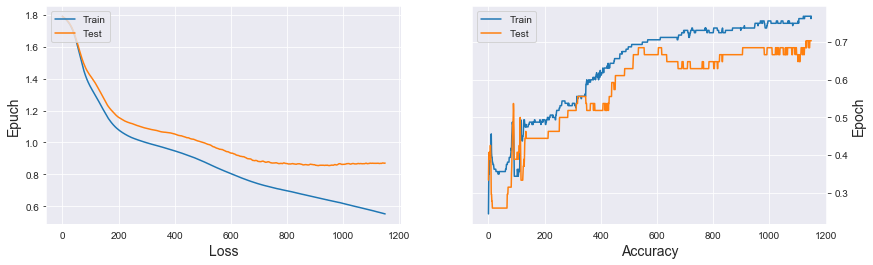

In [50]:
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Loss', fontsize=14)
axes[0].set_ylabel('Epuch', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper left')

axes[1].plot(history.history['acc'])
axes[1].plot(history.history['val_acc'])
axes[1].set_xlabel('Accuracy', fontsize=14)
axes[1].set_ylabel('Epoch', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='upper left')

plt.show()

In [51]:
print("Training set: ", history.history.get('acc')[-1])
print("Test set: ", history.history.get('val_acc')[-1])

Training set:  0.7687500044703484
Test set:  0.7037037014961243


## <span id="13"></span> 5. Comparing the Results

In [52]:
models = [('Logistic Regression', accuracy_lr_train, accuracy_lr_test),
          ('KNN', accuracy_knn_train, accuracy_knn_test),
          ('SVM (Linear)', accuracy_svm_linear_train, accuracy_svm_linear_test),
          ('SVM (Kernel)', accuracy_svm_kernel_train, accuracy_svm_kernel_test),
          ('Naive Bayes', accuracy_nb_train, accuracy_nb_test),
          ('Decision Tree Classification', accuracy_dt_train, accuracy_dt_test),
          ('Random Forest Classification', accuracy_rf_train, accuracy_rf_test),
          ('ANN', history.history.get('acc')[-1], history.history.get('val_acc')[-1]),
         ]

In [53]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression,0.68125,0.666667
1,KNN,1.00000,0.740741
2,SVM (Linear),0.75000,0.703704
3,SVM (Kernel),0.81875,0.777778
4,Naive Bayes,0.31250,0.351852
5,Decision Tree Classification,0.90000,0.685185
6,Random Forest Classification,1.00000,0.796296
7,ANN,0.76875,0.703704


### <span id="14"></span> Visualizing Models Performance

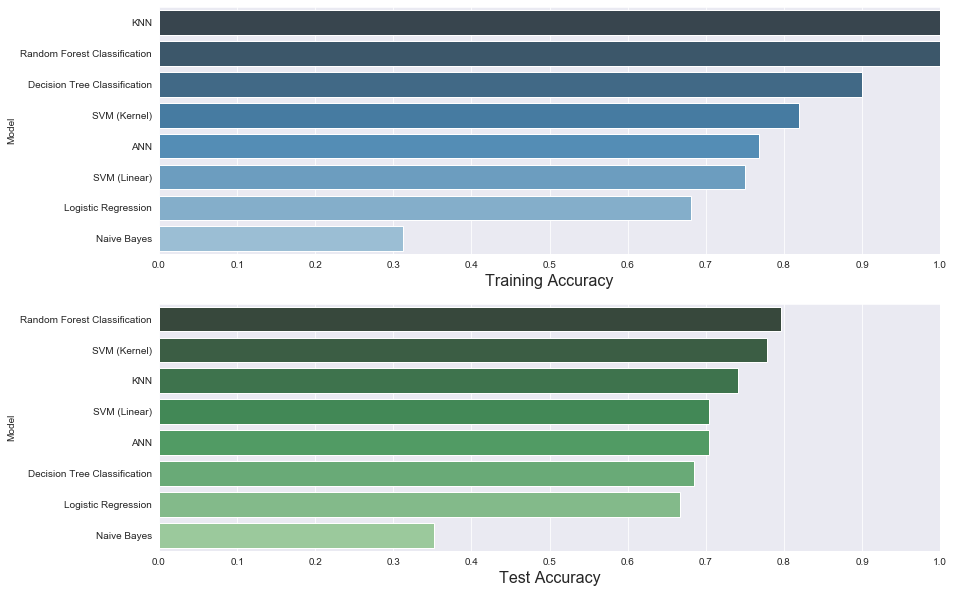

In [54]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

## <span id="15"></span> 6. Conclusion

In this kernel, I have built 8 classification models using Glass Identification Dataset. These are logistic, k-nn, svm(linear), svm(kernel), naive bayes, decision tree, random forest and artificial neural network. Then measured and visualized the performance of the models. Please make a comment and let me know how to improve model performance, visualization or something in this kernel. This will also help me on my future works.

<b><font color="red">Don't forget to </font></b> <b><font color="green">UPVOTE </font></b> if you liked this kernel, thank you. 🙂👍